In [60]:
# number plate recognition
# imported libraries
import cv2
import imutils
import pytesseract # used for OCR to recognise text image
import matplotlib.pyplot as plt
pytesseract.pytesseract.tesseract_cmd = 'C:\Program Files\Tesseract-OCR\\tesseract'

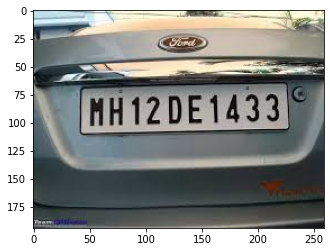

In [61]:
image = cv2.imread('carnp.jpg')
plt.imshow(image)

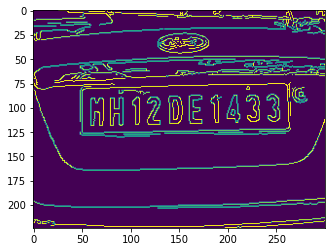

In [62]:
image = imutils.resize(image, width=300 )# resizing the image to reduce the competition time

smt_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(smt_gray) # bgr-grey scale

smt_gray = cv2.bilateralFilter(smt_gray,11,17,17) # This applies bilateral filtering to the grayscale image to smoothen the image while preserving the edges
edged = cv2.Canny(smt_gray,30,200) # This applies edge detection to the smoothened image using the Canny algorithm.
plt.imshow(edged)

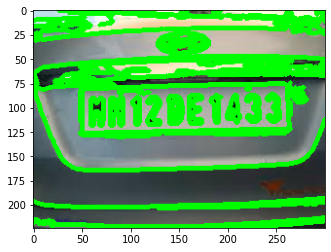

In [63]:
# Contours are defined as the line joining all the points along the boundary of an image that are having the same intensity
cnts,new = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE) # This finds contours in the edges detected image using the findContours() function.

image1=image.copy()
# print(cnts)
countour = cv2.drawContours(image1,cnts,-1,(0,255,0),3) # This draws the contours on the original input image.
# cv2.imshow("contours",image1)
# cv2.waitKey(0)
plt.imshow(countour)


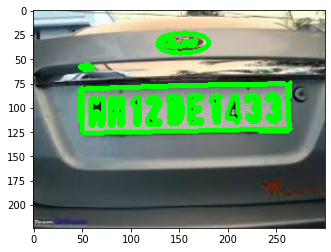

In [64]:
# sorting identified counters
cnts = sorted(cnts, key = cv2.contourArea, reverse = True) [:30] #his line sorts the contours in descending order based on their area and keeps the top 30 contours. These top 30 contours are most likely to be the contours of the number plate.
screenCnt = None # Initializing the variable `screenCnt` to None. This variable will be used to store the contour of the number plate
image2 = image.copy()
img2 = cv2.drawContours(image2,cnts,-1,(0,255,0),3)
plt.imshow(img2)

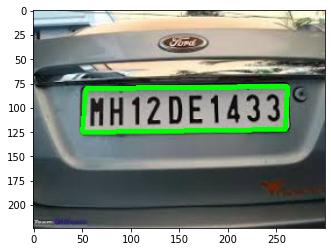

In [65]:
# finding number plate , here counter with 4 sides
i=7 # wats this 7?
for c in cnts:
    perimeter = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.018 * perimeter, True)
    if len(approx) == 4:
            screenCnt = approx
            x, y, w, h = cv2.boundingRect(c)
            new_img = image[y:y + h, x:x + w]
            cv2.imwrite('./' + str(i) + '.png', new_img)
            i += 1
            break
# here        cv2.approxPolyDP is used to get number of sides of polygon
#             cv2.boundingRect(c) : This finds the coordinates of the part identified as the license plate.
cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 3)
plt.imshow(image)

Number plate is: MH12DE1433
 <class 'str'>


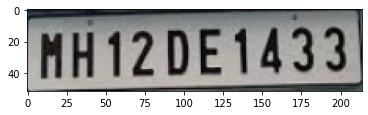

In [66]:
image = cv2.imread('/full/path/to/image.jpg')
Cropped_loc = './7.png'
plt.imshow(cv2.imread(Cropped_loc))
plate = pytesseract.image_to_string(Cropped_loc, lang='eng')# OCR RECOZNIZES THE EXTRACTED IMAGES
print("Number plate is:", plate,type(plate))